In [1]:
prefix="convert the image into a high quality and detailed"
suffix="style"
train_dir="/my/datasets/path/PACS/kfold"
fractal_dir="/my/datasets/path/deviantart"

# prompts=f"{prefix} art painting {suffix},{prefix} cartoon {suffix},{prefix} photo {suffix},{prefix} sketch {suffix}"
styles = ["watercolor", "rainbow", "sunset", "aurora", "snowy", "autumn", "Ukiyo-e", "sketch with crayon", "mosaic"]

prompts = ""
for style in styles:
  prompts += f"{prefix} {style} {suffix},"

! python ./main.py --train_dir {train_dir} --fractal_dir {fractal_dir} --prompts "{prompts}" --multi_domain true --num_images=1

^C



Loading pipeline components...:  67%|██████▋   | 4/6 [00:00<00:00, 16.39it/s]c:\Users\Austi\anaconda3\envs\pytorch_gpu\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 17.24it/s]
c:\Users\Austi\anaconda3\envs\pytorch_gpu\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
c:\Users\Austi\anaconda3\envs\pytorch_gpu\lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\nativ

augmenting domain: art_painting


Loading pipeline components...:  17%|█▋        | 1/6 [00:00<00:00,  7.30it/s]c:\Users\Austi\anaconda3\envs\pytorch_gpu\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 15.93it/s]
c:\Users\Austi\anaconda3\envs\pytorch_gpu\lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
100%|██████████| 50/50 [00:14<00:00,  3.35it/s]


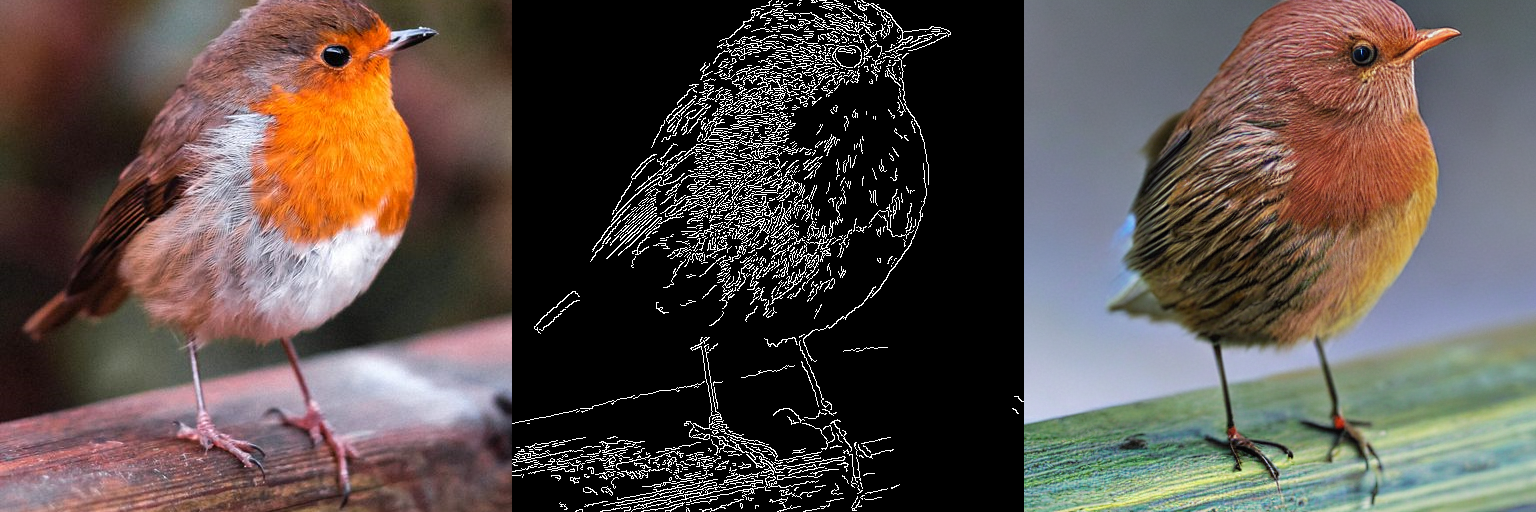

In [2]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers.utils import load_image, make_image_grid
import numpy as np
import torch
from PIL import Image
import cv2

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", use_safetensors=True)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5", 
    controlnet=controlnet, 
    use_safetensors=True,
    safety_checker = None,
    requires_safety_checker = False).to("cuda")

original_image = load_image("https://huggingface.co/takuma104/controlnet_dev/resolve/main/bird_512x512.png")
original_image = original_image.resize((512, 512))
image = np.array(original_image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

image = pipe("", image=canny_image, guess_mode=True, guidance_scale=3.0).images[0]
make_image_grid([original_image, canny_image, image], rows=1, cols=3)